In [1]:
import pandas as pd
from exosyspop.populations import TRILEGAL_BGBinaryPopulation

targets = pd.read_hdf('targets.h5')
bgstars = pd.read_hdf('bgstars.h5').query('m_ini > 0.11')

# Sanitize dtypes of targets DataFrame
for c in targets.columns:
    if targets[c].dtype == object:
        targets.loc[:,c] = targets.loc[:,c].astype(str)

pop = TRILEGAL_BGBinaryPopulation(targets, bgstars)

import logging
rootLogger = logging.getLogger()

/u/tdm/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


BGEB: dmag regressor trained, R2=0.980150218601
BGEB: qR regressor trained, R2=0.961700431826
BGEB: Depth trained: R2=0.997388242454
BGEB: Duration trained: R2=0.998716987036
BGEB: Slope trained: R2=0.992519879133


/u/tdm/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


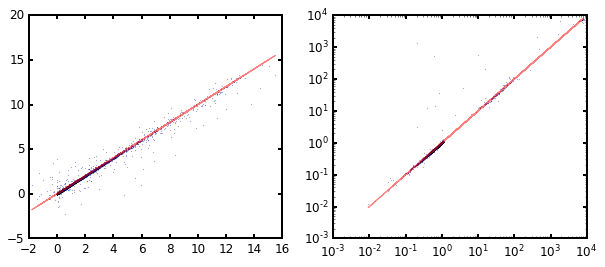

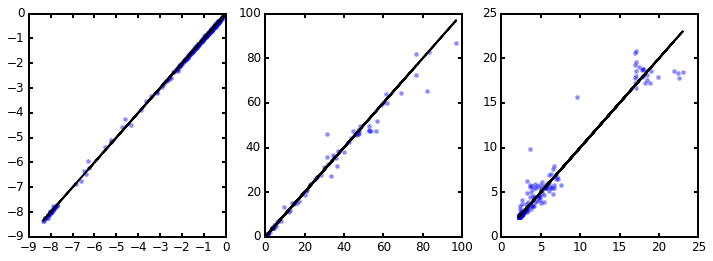

In [2]:
%matplotlib inline
rootLogger.setLevel(logging.INFO)
pop._train_pipelines(n_jobs=8, plot=True)
pop._train_trap(N=1000, plot=True);

In [ ]:
obs_pop = pop.get_N_observed(N=5000, new_orbits=True, query='T14_pri < 2 or T14_sec < 2')

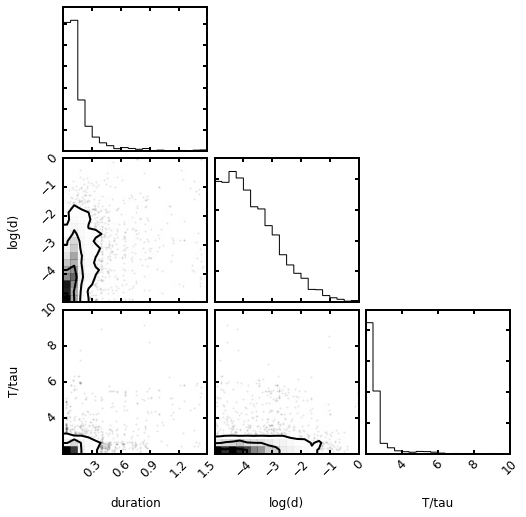

In [5]:
obs_pop.trap_corner(range=[(0,1.5), (-5,0), (2,10)]);

In [6]:
pop.save('bgpop', overwrite=True)

In [7]:
pop = TRILEGAL_BGBinaryPopulation.load('bgpop')

In [8]:
obs = pop.observe(regr_trap=True)

In [11]:
rootLogger.setLevel(logging.INFO)
%prun pop.observe(new=True, regr_trap=True)

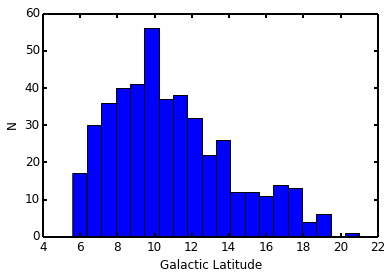

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
obs = pop.observe(new=True)
plt.hist(obs.b_target.values, bins=20);
plt.xlabel('Galactic Latitude')
plt.ylabel('N');